### Logistic Regression - Binary Classification

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,NaN,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [141]:
data.dropna(inplace = True)

In [142]:
X = data.iloc[:,2:-1].values
Y = data.iloc[:,-1].values

In [144]:
r="""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encode = ohe.fit_transform(data[["Gender"]]).toarray()
encode = pd.DataFrame(encode , columns=["A","B"])
# encode.drop(['B'],axis=1)
final_df = pd.concat([encode , data], axis=1)
final_df"""

In [145]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X[:,0] = lb.fit_transform(X[:,0])

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [149]:
print(len(X))
print(len(X_train))
print(len(x_test))

390
312
78


In [150]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [151]:
y_pred = model.predict(x_test)

In [152]:
from sklearn.metrics import accuracy_score , precision_score , recall_score
acc = accuracy_score(y_pred , y_test)
precision = precision_score(y_pred , y_test)
recall = recall_score(y_pred , y_test)
print("Precision = ",precision) # tp / (tp+fp)
print("Recall = ",recall) # tp / (tp+fn)
print("Accuracy  = ",acc) # tp+fn / (tp+tn+fp+fn)

Precision =  0.7586206896551724
Recall =  0.9565217391304348
Accuracy  =  0.8974358974358975


In [153]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_pred , y_test)
print("confusion_matrix \n",cm)

confusion_matrix 
 [[48  7]
 [ 1 22]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


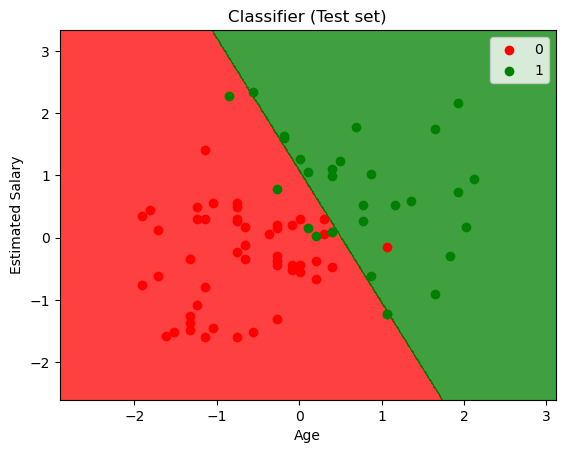

In [154]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()